In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import jensenshannon

from networld_utils import *

In [2]:
data_path = '../data/Networld_N200_TMax10000/'
betas = [0.001,0.0015849,0.0025119,0.0039811,0.0063096,
         0.01,0.015849,0.025119,0.039811,0.063096,
         0.1,0.15849,0.25119,0.39811,0.63096,
         1, 1.5849, 2.5119, 3.9811, 6.3096, 10]

In [14]:
js_divs = []
for beta in betas:
    nt_full = [pd.read_csv(data_path + file) 
                for file in os.listdir(data_path) if f'Beta{beta}_' in file]
    
    time_ab = []
    tlims = np.arange(0,10000,50)[1:]
    for tlim in tlims:
        nt_tlim = [nt.loc[(nt['t'] < tlim) & (nt['t'] > tlim-50)] for nt in nt_full]
        abdata = compute_abundance(nt_tlim)
        abdata['tlim'] = tlim
        time_ab.append(abdata)

    time_ab = pd.concat(time_ab)
    time_ab = pd.pivot_table(time_ab, values='Ab', index='tlim', columns='NRed')
    time_ab = time_ab.fillna(0)

    js_div = np.zeros_like(tlims, dtype=float)
    for i in range(1,len(js_div)):
        js_div[i] = jensenshannon(time_ab.iloc[i-1], time_ab.iloc[i])
    js_div[0] = np.nan

    #time_ab_shift = time_ab.shift()
    #js_div = jensenshannon(time_ab.T,time_ab_shift.T)

    js_divs.append(js_div)



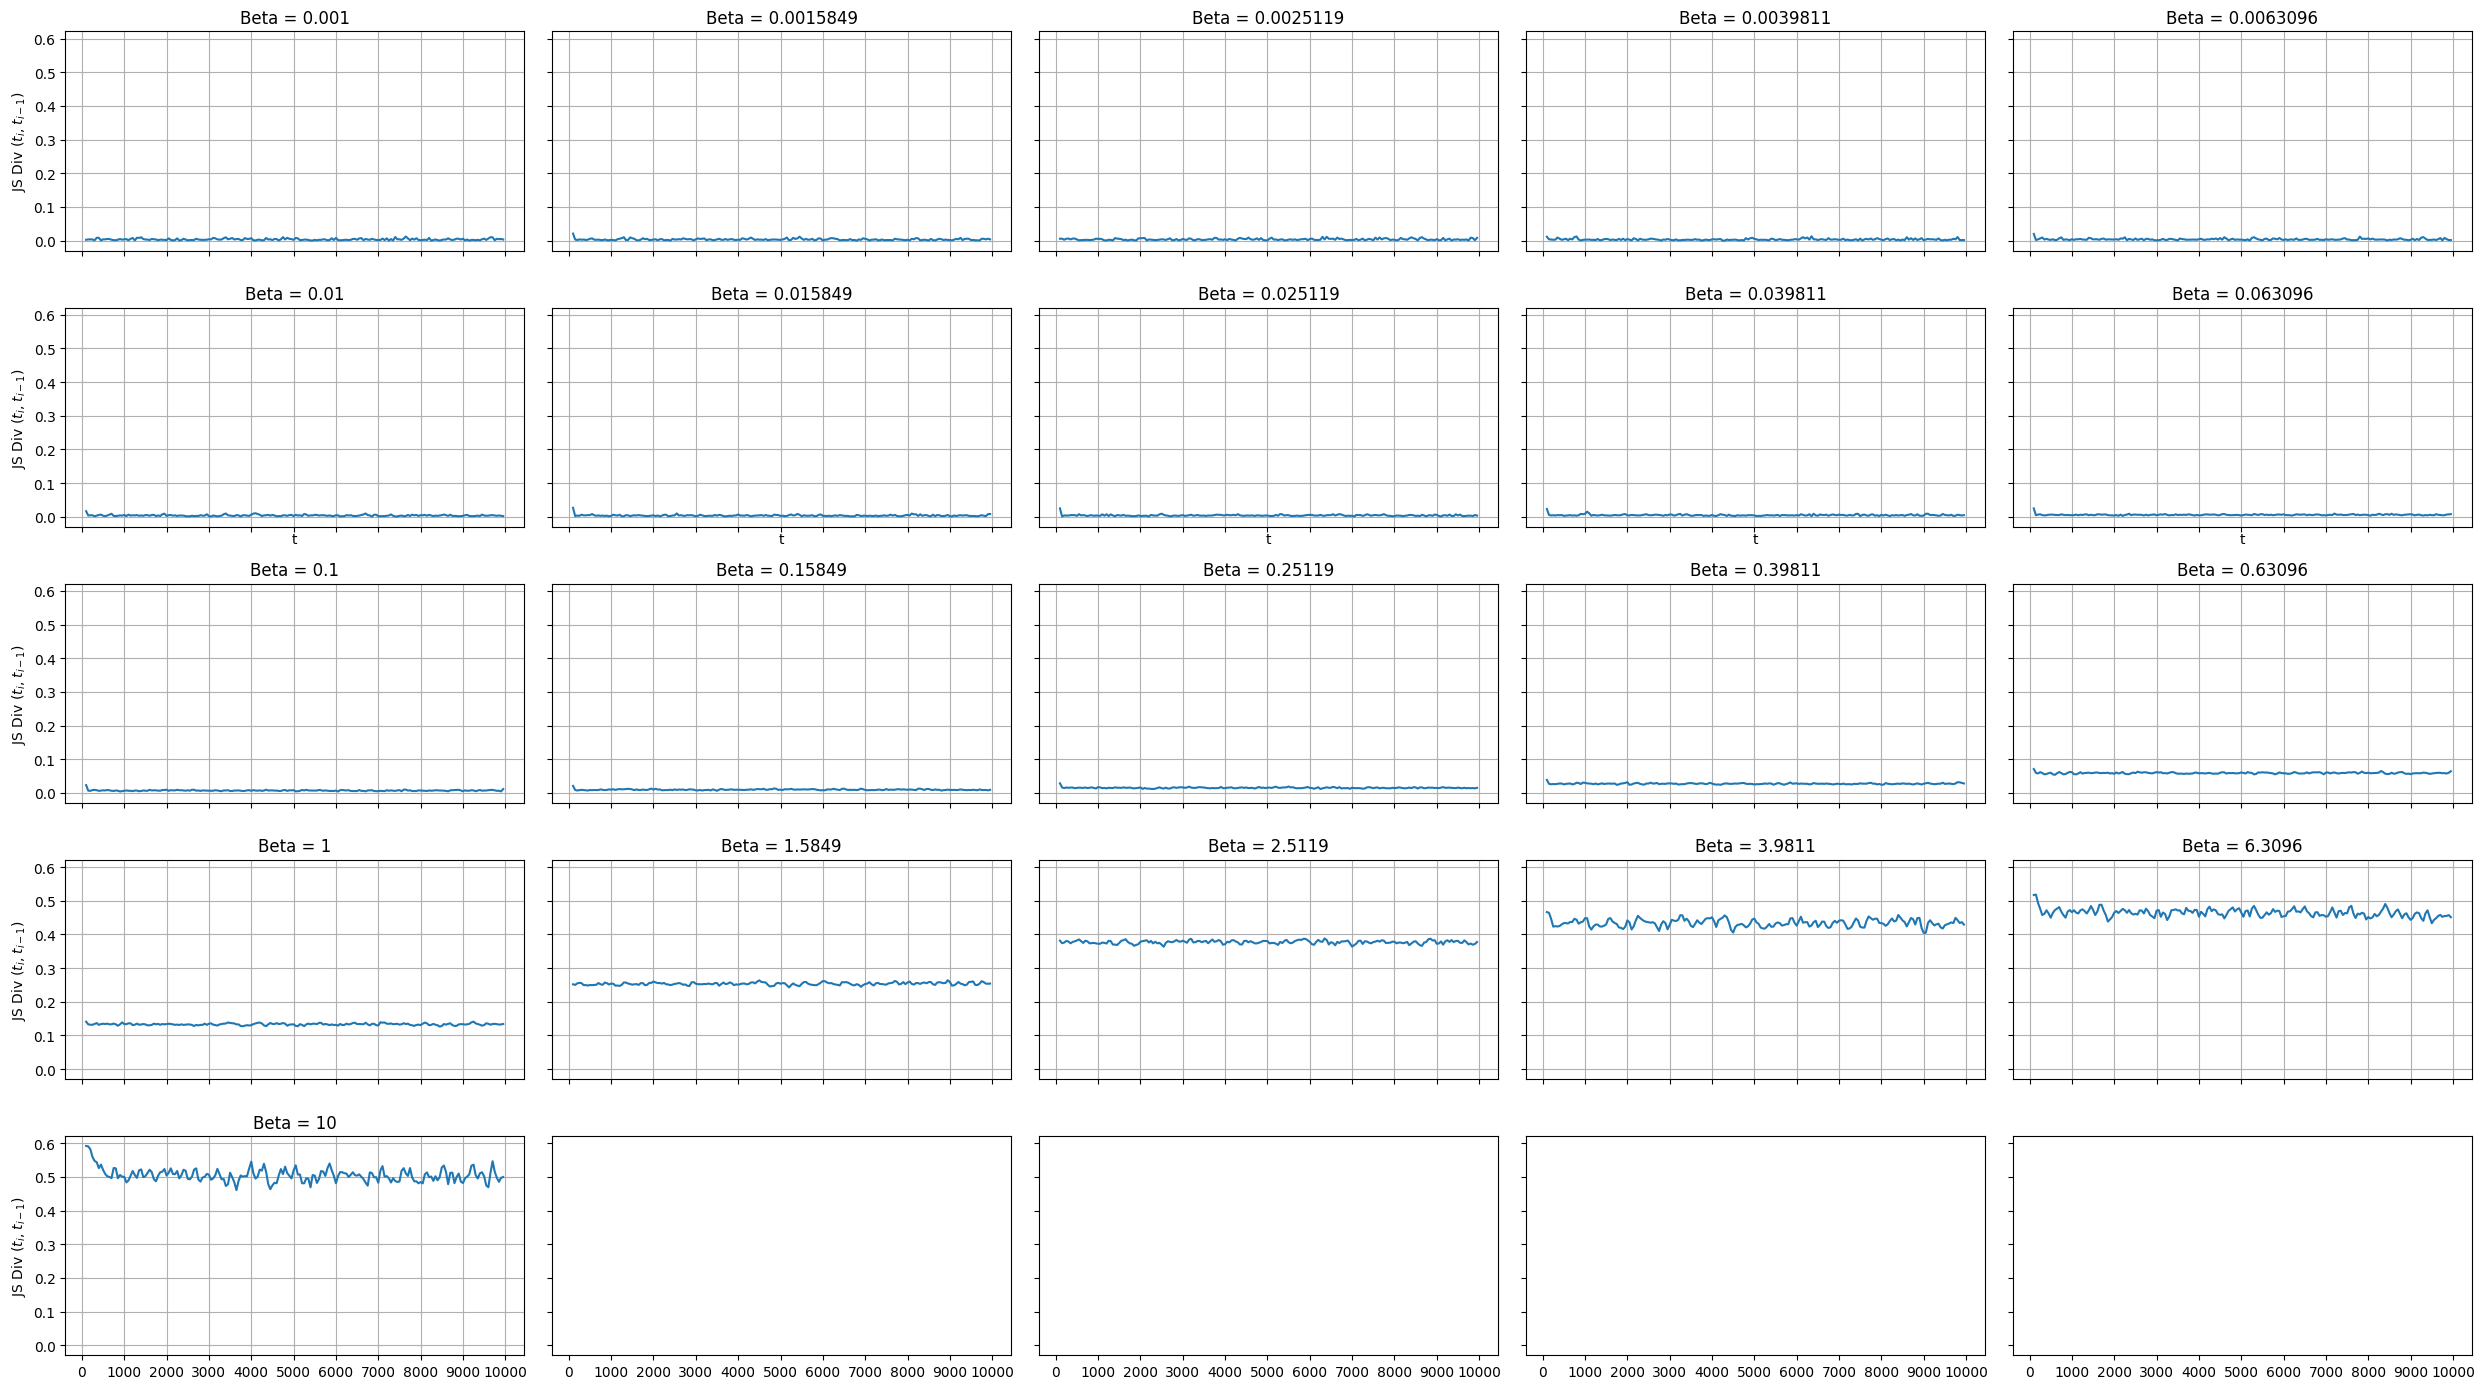

In [15]:
fig, axs = plt.subplots(5, 5, figsize=(25,14), sharex='all', sharey='all')

for i in range(5):
    for j in range(5):
        if i == 4 and j > 0:
            continue
        level = 5*i+j
        axs[i][j].plot(tlims, js_divs[level])
        if i == 1:
            axs[i][j].set_xlabel('t')
        if j == 0:
            axs[i][j].set_ylabel(r'JS Div ($t_i$, $t_{i-1}$)')
        axs[i][j].set_title(f'Beta = {betas[level]}')
        axs[i][j].set_xticks(np.arange(0,10001,1000))
        axs[i][j].grid()

plt.tight_layout()

In [16]:
time_abs = []
for beta in betas:
    nt_full = [pd.read_csv(data_path + file) 
                for file in os.listdir(data_path) if f'Beta{beta}_' in file]
    
    time_ab = []
    tlims = np.arange(0,10000,500)[1:]
    for tlim in tlims:
        nt_tlim = [nt.loc[(nt['t'] < tlim) & (nt['t'] > tlim-500)] for nt in nt_full]
        abdata = compute_abundance(nt_tlim)
        abdata['tlim'] = tlim
        time_ab.append(abdata)

    time_ab = pd.concat(time_ab)
    time_ab = pd.pivot_table(time_ab, values='Ab', index='tlim', columns='NRed')
    time_ab = time_ab.fillna(0)

    time_ab = time_ab[time_ab.sum().sort_values(ascending=False).iloc[:99].index]
    time_ab[100] = 1 - time_ab.sum(axis=1)
    time_abs.append(time_ab)



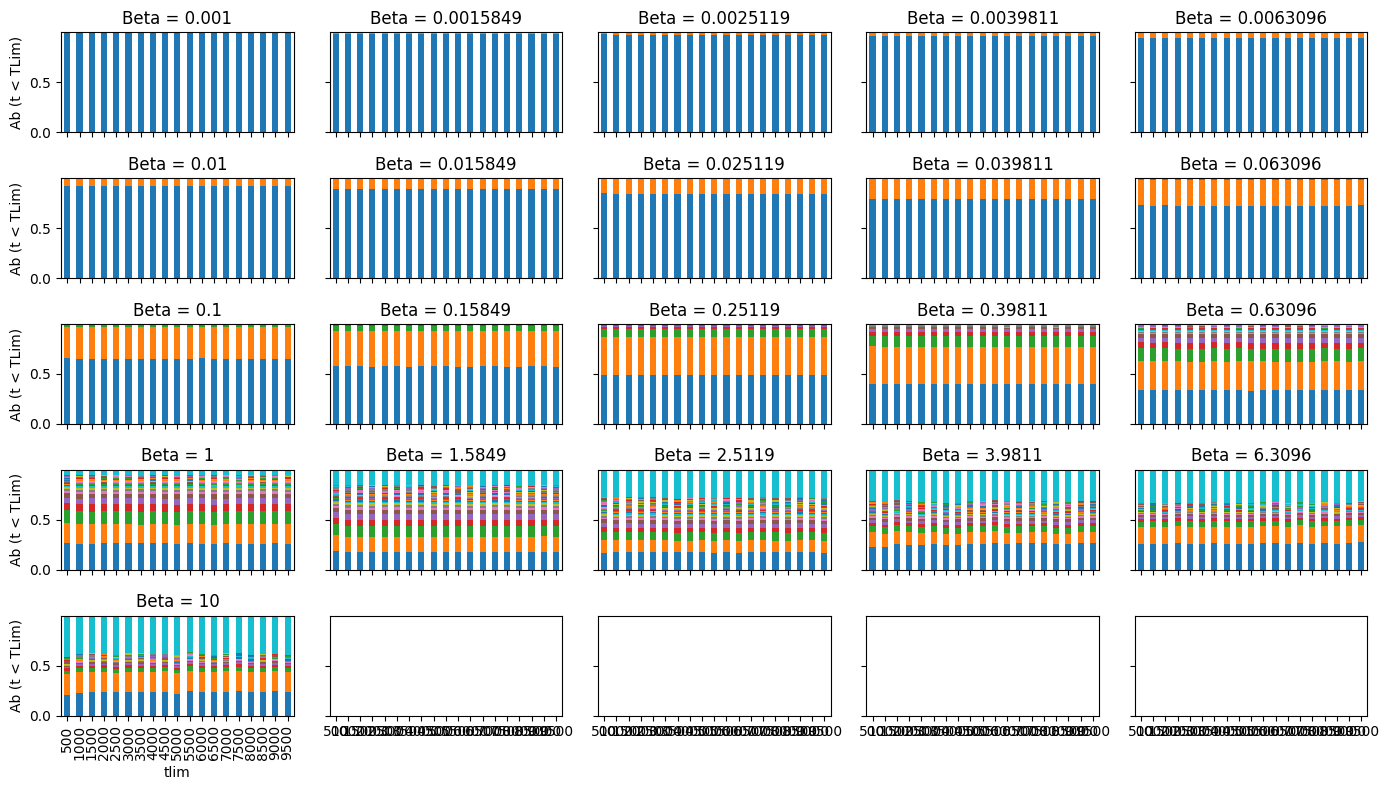

In [17]:
fig, axs = plt.subplots(5, 5, figsize=(14,8), sharex='all', sharey='all')

for i in range(5):
    for j in range(5):
        if i == 4 and j > 0:
            continue
        level = 5*i+j
        time_abs[level].plot.bar(stacked=True, ax=axs[i][j], legend=False)
        if i == 1:
            axs[i][j].set_xlabel('TLim')
        if j == 0:
            axs[i][j].set_ylabel(r'Ab (t < TLim)')
        axs[i][j].set_title(f'Beta = {betas[level]}')

plt.tight_layout()